# Iris Flower Classification using different ML algorithms

In [4]:
import pandas as pd
import numpy as np
import plotly #visualization tool
import plotly.express as px #wrapper of plotly, better to use graphs with express
import plotly.offline as pyo #
import cufflinks as cf #used to bind pandas and plotly together
from plotly.offline import init_notebook_mode,plot,iplot

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [6]:
iris=pd.read_csv(r'E:\Data\iris_flower_classificartion_project\Iris.csv')

In [7]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
iris.shape

(150, 6)

In [9]:
iris.drop('Id',axis=1,inplace=True)

In [10]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Visualization of Data

In [11]:
px.scatter(iris,x='Species',y='PetalWidthCm')

In [12]:
px.scatter(iris,x="Species",y="PetalLengthCm")

In [13]:
px.scatter(iris,x="Species",y="SepalWidthCm")

In [14]:
px.scatter(iris,x="Species",y="SepalLengthCm",size="SepalLengthCm")

In [15]:
px.bar(iris,x="Species",y="SepalLengthCm")

<BarContainer object of 150 artists>

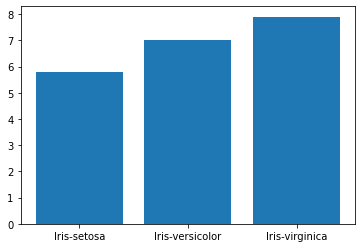

In [16]:
plt.bar(iris['Species'],iris['SepalLengthCm'])

In [17]:
#using plotly not plotly.express
iris.iplot(kind='bar',x='Species',y='SepalLengthCm',xTitle="Species",yTitle="SepalLengthCm")

In [18]:
#line graph
px.line(iris,x='Species',y='SepalLengthCm')

In [19]:
iris.rename(columns={'SepalLengthCm':'SepalLength', 'SepalWidthCm':'SepalWidth', 'PetalWidthCm':'PetalWidth', 'PetalLengthCm':'PetalLength' },inplace=True)

In [20]:
#Scatter matrix
px.scatter_matrix(iris,color="Species",title="Iris",dimensions=['SepalLength','SepalWidth','PetalWidth','PetalLength'])

## Data preprocessing

In [21]:
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [22]:
#Features
X=iris.drop(['Species'],axis=1)
X.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
# Labels
Y=iris['Species']
Y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [24]:
# to convert the labels into numeric form .i.e, 0 for setose , 1 for versicolor and 2 for virginica
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
Y=le.fit_transform(Y)

In [25]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [26]:
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder(sparse=False)
encoder.fit_transform(Y.reshape(-1,1))

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [27]:
# converting features
X=np.array(X)
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

## Splitting the data for training and testing

In [28]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)
#Significance of random_state: When random_state is set to any integer it will return the same set of inputs as training and testing set, otherwise if set to None it will give different results each time for training and testing set.

In [29]:
X_train.shape

(105, 4)

## 1.Decision Tree algorithm

In [30]:
from sklearn import tree
from sklearn.metrics import accuracy_score

In [31]:
#training model
DT=tree.DecisionTreeClassifier()
DT.fit(X_train,Y_train)

DecisionTreeClassifier()

In [32]:
#Checking the accuracy of the model by using X_test on the DT model
prediction_DT=DT.predict(X_test)
accuracy_DT=accuracy_score(Y_test,prediction_DT)*100

In [33]:
accuracy_DT

97.77777777777777

In [34]:
Y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0])

In [35]:
prediction_DT

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

As shown above some of the value(to be precise 1 in the test set) is incorrect and due to which the accuracy of the Decision tree model is not 100.

In [36]:
import os

In [37]:
os.environ["PATH"]+=os.pathsep+(r'C:\Users\DELL\bin')
import graphviz

vis_data=tree.export_graphviz(DT,out_file=None, feature_names=iris.drop(['Species'],axis=1).keys(),class_names=iris['Species'].unique(), filled=True,rounded=True, special_characters=True)

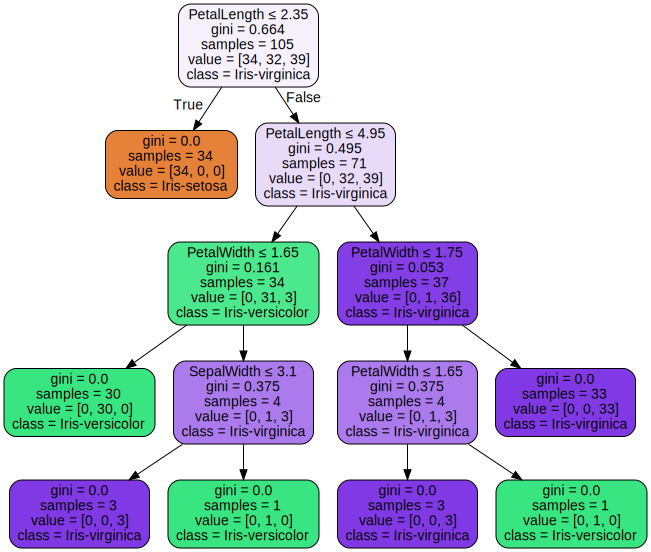

In [38]:
graphviz.Source(vis_data)

In [39]:
# Random input
category=['Iris-setosa','Iris-versicolor','Iris-virginica']

In [40]:
X_DT=np.array([[5.7,3,4.2,1.2]])
X_DT_prediction=DT.predict(X_DT)

In [41]:
X_DT_prediction[0]
print(category[int(X_DT_prediction[0])])

Iris-versicolor


## 2. K-Nearest neighbor algorithm

In [42]:
# it is used for scaling of the features
from sklearn.preprocessing import StandardScaler
sc=StandardScaler().fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

In [46]:
X_train_std[0:3,:]

array([[-1.02366372, -2.37846268, -0.18295039, -0.29145882],
       [ 0.69517462, -0.10190314,  0.93066067,  0.73721938],
       [ 0.92435306,  0.58106472,  1.04202177,  1.6373128 ]])

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train_std,Y_train)

KNeighborsClassifier(n_neighbors=4)

In [58]:
predict_knn=knn.predict(X_test_std)
accuracy_knn=accuracy_score(Y_test,predict_knn)*100
accuracy_knn

97.77777777777777

In [62]:
#Random input
X_knn=np.array([[1,1,1,1]])
X_knn_std=sc.transform(X_knn)
X_knn_predict=knn.predict(X_knn_std)

In [63]:
print(category[int(X_knn_predict[0])])

Iris-versicolor


In [72]:
# to predict the most accurate value of k in k-nearest neighbor
k_range=range(1,26)
scores={}
score_list=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_std,Y_train)
    prediction_knn=knn.predict(X_test_std)
    scores[k]=accuracy_score(Y_test,prediction_knn) * 100
    score_list.append(scores[k])

In [73]:
score_list

[93.33333333333333,
 95.55555555555556,
 97.77777777777777,
 97.77777777777777,
 97.77777777777777,
 97.77777777777777,
 97.77777777777777,
 97.77777777777777,
 97.77777777777777,
 97.77777777777777,
 97.77777777777777,
 97.77777777777777,
 97.77777777777777,
 97.77777777777777,
 97.77777777777777,
 97.77777777777777,
 95.55555555555556,
 97.77777777777777,
 93.33333333333333,
 95.55555555555556,
 93.33333333333333,
 95.55555555555556,
 93.33333333333333,
 91.11111111111111,
 91.11111111111111]

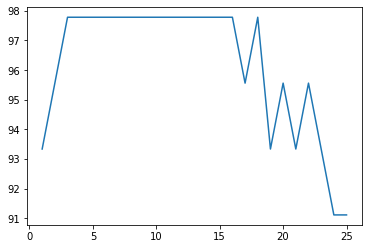

In [74]:
plt.plot(k_range,score_list)

Without scaling the data and training the training the data on an unscaled data, the answer will always be wrong . So, it is essential to scale the data in case of kNN , so that the model is trained perfectly.

## 3. k-means clustering algorithm(Unsupervised Learning)

 not using Y_train or Y_test only directly use X

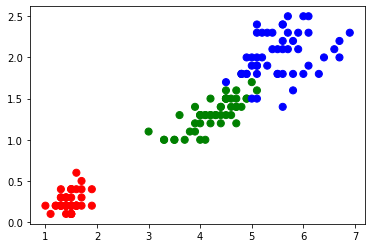

In [76]:
colormap=np.array(['Red','Green','Blue'])
fig=plt.scatter(iris['PetalLength'],iris['PetalWidth'],c=colormap[Y],s=50)

In [79]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3, random_state=2,n_jobs=4)
km.fit(X)
centers=km.cluster_centers_
print(centers)

c:\users\dell\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\cluster\_kmeans.py:967: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.



[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [80]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [81]:
category=['Iris-versicolor','Iris-setosa','Iris-virginica']

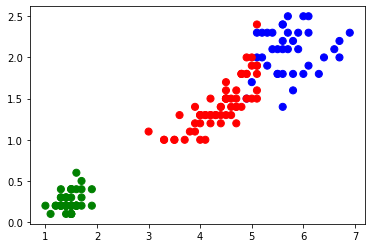

In [82]:
# after fitting the k-means model
colormap=np.array(['Red','Green','Blue'])
fig=plt.scatter(iris['PetalLength'],iris['PetalWidth'],c=colormap[km.labels_],s=50)

In [86]:
# Custom input
X_km=np.array([[5.1,3.5,1.4,0.2]])
X_km_prediction=km.predict(X_km)
X_km_prediction[0]
print(category[int(X_km_prediction[0])])

Iris-setosa
